In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import data
import gp2

In [3]:
import os

In [4]:
workingdir = '/tmp/tmpsbsac6t_GP2'

In [5]:
M = data.Manager.load(os.path.join(workingdir, 'M_step6.pickle'))

In [6]:
D = M.get('D')

In [7]:
D_, D_ids = D.to_array()
D_images = D_[:,:,:,0]
D_masks = D_[:,:,:,1]
D_labels = D_[:,0,0,2]

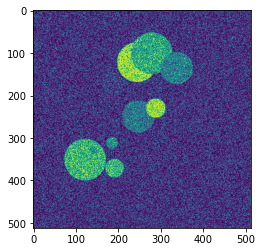

In [8]:
imshow(D_images[0])

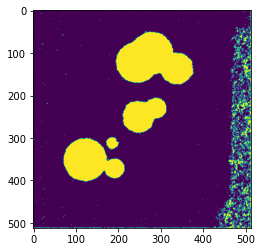

In [9]:
imshow(D_masks[0])

In [10]:
D_labels[0]

1

In [11]:
PERCENT_TO_REPLACE = 30

selected_ids = list( np.random.choice(D_ids, len(D_ids)//int(100/PERCENT_TO_REPLACE)) )

In [12]:
selected_ids

['6c259fd6-6909-4be9-a051-540c67475b56',
 '093d5303-f70d-4bfa-8f15-835d635bc337',
 'ad32e1f2-c040-4687-b007-795064218294',
 '4ed7f4e0-f5dc-473b-b2d3-f5b806a63d51',
 '1374ea02-67b7-4b89-8346-7c6fb74fbc85',
 'd8784376-298e-4a05-b62d-e897a13cae7f',
 '9d03b980-6c52-484a-80fd-47f518fff43c',
 'eb0af483-7010-4b12-ac5c-6445c9004d92',
 'eb0af483-7010-4b12-ac5c-6445c9004d92',
 '3cd6760b-b0d8-43cd-afbc-f701dd5773b4',
 'f5ae293f-ab43-4b1b-afa7-0b2645b7450e',
 'cc3d4024-343c-4080-8cc3-2bcdd364f9b5',
 '4ed7f4e0-f5dc-473b-b2d3-f5b806a63d51',
 '5e92ebf6-774c-4c47-82b8-43a40091a65c',
 '3cd6760b-b0d8-43cd-afbc-f701dd5773b4',
 'fd6d755e-9968-4f4e-8d33-66ef97979798']

In [13]:
D_relabeled_ = np.empty((len(selected_ids),)+D_.shape[1:], dtype=D_.dtype)

In [14]:
D_.shape, D_relabeled_.shape

((48, 512, 512, 3), (16, 512, 512, 3))

In [15]:
# TODO prefill array with image and labels, then replace labels with groundtruth!!

In [16]:
A_test = M.get('A_test')
B = M.get('B')

In [17]:
uniqids_in_D = list(D.data.keys())

for i,k in enumerate(selected_ids):
    # i is running number 0..len(selected_ids)
    # k is the uniqid of a datapoint
    
    # j is the position of the uniqid in D
    j = uniqids_in_D.index(k)
    
    # grab image
    image = D_[j, :, :, 0]
    label = D_[j, 0, 0, 2]
    
    origin = ''
    if (k in A_test.data):
        origin = 'A_test'
    else:
        origin = 'B' # will this ever happen, we don't know - it definitely could
        
    ### SIMULATION CASE -> just grab ground truth###
    ### OTHERWISE THIS IS THE ENTRYPOINT FOR MANUAL RE-LABELING ###
    relabeled = M.get(origin).data[k][:,:,1]
    
    D_relabeled_[i,:,:,0] = image
    D_relabeled_[i,:,:,1] = relabeled
    D_relabeled_[i,0,0,2] = label
 

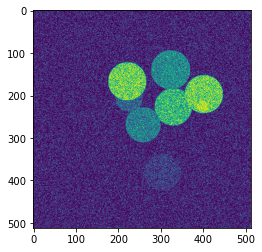

In [18]:
imshow(D_relabeled_[0,:,:,0])

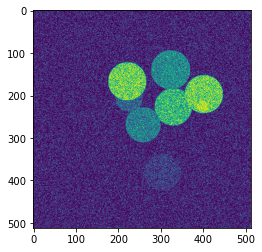

In [19]:
imshow(D_[uniqids_in_D.index(selected_ids[0]),:,:,0])

In [20]:
D_relabeled = data.Collection.from_list(D_relabeled_, selected_ids)

In [21]:
M.register(D_relabeled, 'D_relabeled')

In [22]:
M.find(selected_ids[0], show_names=True)

{'A_test': <data.collection.Collection at 0x7f011f363820>,
 'A_test_pred': <data.collection.Collection at 0x7f011f3637c0>,
 'C': <data.collection.Collection at 0x7f011f363700>,
 'C_test': <data.collection.Collection at 0x7f011eba44f0>,
 'C_test_pred': <data.collection.Collection at 0x7f011ebac850>,
 'D': <data.collection.Collection at 0x7f011ebb0bb0>,
 'D_relabeled': <data.collection.Collection at 0x7f01121a9cd0>}

In [23]:
M.save(os.path.join(workingdir, 'M_step7.pickle'))